In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize

## Problem 1: Hartree-Fock for Helium

I don't really understand how to solve this without finite differences. Check Thissen tomorrow!

## Problem 2: The Poisson Equation

The Hartree potential is generated by the charge distribution: 

$$ V_H(r) = \int dr' \frac{n(r')}{|r-r'|} \rightarrow \nabla^2 V_H(r) = -4\pi n(r)$$

The ground state density of the helium atom is $n(r) = 2n_s(r) = 2 |\varphi(r)|^2$ where $n_s$ is the density for one orbital (one electron). Introducing the electro-static potential $\nabla^2 V_{sH}(r) = -4\pi n_s(r)$ and using $U(r) = r V_{sH}(r)$ as well as $u(r) = \sqrt{4 \pi n_s(r)} = \sqrt{4\pi} r \varphi(r)$ we can write the Poisson equation on the form

$$ \frac{d^2}{dr^2}U(r) = -\frac{u^2(r)}{r}, \hspace{10px} U(0) = 0, U(r_{max}) = 1 $$.

Finally, using $U_0(r) = U(r) - r/r_{max}$ we obtain 

$$ \frac{d^2}{dr^2}U_0(r) = -\frac{u^2(r)}{r}, \hspace{10px} U_0(0) = 0, U_0(r_{max}) = 0 $$.

We wish to solve this for $U(r)$. Rewriting using the finite difference method, we obtain the following system off equations (written on diagonal form utilizing the boundary conditions on $U_0$) (on N points $i\in(1,N)):

$$ A' U_0' = B$$
with

\begin{equation}
    A' = 
    \begin{bmatrix}
        -2 & 1 & 0 & 0 & 0 \\
         1 & -2 & 1 & 0 & 0 \\
         0 & 1 & -2 & 1 & 0 \\
        ... \\
    \end{bmatrix}
\end{equation},

\begin{equation}
    B = 
    \begin{bmatrix}
        b(r_1) = - 4 \pi h^2 |\varphi(r_1)|^2 r_1 - 0\\
        b(r_2) \\
        b(r_3) \\
        ... \\
    \end{bmatrix}
\end{equation}

We use Hartree units, such that $m_e = 1, e = 1, \hbar=1, 4\pi\epsilon_0 = 1, a_0=1$.

Text(0, 0.5, '$V(r)$')

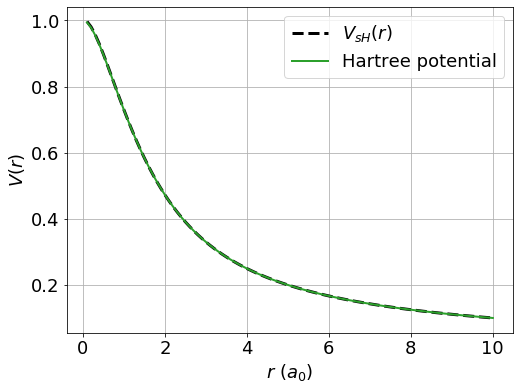

In [3]:
def hydrogen_ground_state(r):
    return 1/np.sqrt(np.pi) * np.exp(-r)

def hart_pot(r):
    return 1/r - (1+1/r)*np.exp(-2*r)

N = 100 # Number of  points
h = 0.1
r = np.array([(i+1)*h for i in range(N)]) # N points between endpoints
phi_dens = hydrogen_ground_state(r)**2
B = -np.array([4*np.pi*h**2*phi_dens[i]*r[i] for i in range(N)])
A_p = np.zeros((N,N)) + np.diagflat(-2*np.ones(N), k=0) + np.diagflat(np.ones(N-1), k=1) + np.diagflat(np.ones(N-1), k=-1)

U0_p = np.linalg.solve(A_p, B) # Solve the system of equations for U_0
# TODO pad with zeros to get boundary?
rmax = r[-1] + h  # The endpoint distance
U = U0_p + r/rmax # Extract U
Vsh = U/r # Extract the static potential

# PLot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r, Vsh, color='k', linestyle='--', linewidth=3, label=r'$V_{sH}(r)$')
ax.plot(r, hart_pot(r), color='C2', linestyle='-', linewidth=2, label='Hartree potential')
ax.legend(loc='best')
ax.grid()
ax.set_xlabel(r'$r$ $(a_0)$')
ax.set_ylabel(r'$V(r)$')

## Problem 3: Kohn-Sham equation

The Kohn-Sham equation equation takes the form:

$$ \left[ -\frac{1}{2}\frac{d^2}{dr^2} -\frac{2}{r} + V_H(r) + V_x(r) + V_c(r) \right]u(r) = \epsilon u(r) $$

with boundary conditions $u(0) = u(r_{max}) = 0$. Rewriting this with the finite difference method, we obtain: 

$$ -\frac{1}{2h^2}\left[u(r_{i+1})+u(r_{i-1})\right] + \left[\frac{1}{h^2} -\frac{2}{r_i} + V_H(r_i) + V_x(r_i) + V_c(r_i) \right]u(r_i) = \epsilon u(r_i) $$

If we rewrite this on matrix form, we obtain the matrix equation: 

$$ Cu = \epsilon \tilde{u} $$
where $\tilde{u} = [u(r_1), u(r_2), ... , u(r_{max}-h)$ i.e. for $ r \in(h, r_{max}-h)$. This is due to the eigenvalue equation being undefined for the endpoints. Thus $C$ is NxN+2, $ u$ is N+2 and $\tilde{u}$ is N.

Using the same trick as in problem 2, we can handle these problematic points by subtracting $-\frac{1}{2h^2}u(r_0)$ and $-\frac{1}{2h^2}u(r_{max})$ from equations for rows 1 and N in $C$. Since they are $u(0) = u(r_{max}=0$) we obtain the equation

$$ C' \tilde{u} = \epsilon \tilde{u} $$
which is a problem on diagonal form, with the boundary conditions baked into the matrix. They will thus automatically appear in our eigenvectors $\tilde{u}$. $C'$ is on the form

\begin{equation}
    C' = 
    \begin{bmatrix}
        \frac{1}{h^2} -\frac{2}{r_1}+V_H(r_1) + V_x(r_1) + V_c(r_1) & -\frac{1}{2h^2} & 0 & 0 & 0 \\
         -\frac{1}{2h^2} & \frac{1}{h^2} -\frac{2}{r_2}+V_H(r_2) + V_x(r_2) + V_c(r_2) & -\frac{1}{2h^2} & 0 & 0 \\
         0 & -\frac{1}{2h^2} & \frac{1}{h^2} -\frac{2}{r_3}+V_H(r_3) + V_x(r_3) + V_c(r_3) & -\frac{1}{2h^2} & 0 \\
        ... \\
    \end{bmatrix}
\end{equation}

For our problem, we wish to solve the radial equation for the hydrogen atom. We thus set $V_H = V_x = V_c = 0$. We call the resulting eigenvalue equation 

$$ \Gamma \tilde{u} = E \tilde{u}$$

with 

\begin{equation}
    \Gamma = 
    \begin{bmatrix}
        \frac{1}{h^2} -\frac{1}{r_1} & -\frac{1}{2h^2} & 0 & 0 & 0 \\
         -\frac{1}{2h^2} & \frac{1}{h^2} -\frac{1}{r_2}& -\frac{1}{2h^2} & 0 & 0 \\
         0 & -\frac{1}{2h^2} & \frac{1}{h^2} -\frac{1}{r_3} & -\frac{1}{2h^2} & 0 \\
        ... \\
    \end{bmatrix}
\end{equation}

In [4]:
N = 2000 # Number of  points
h = 0.005
r = np.array([(i+1)*h for i in range(N)]) # N points between endpoints
Gamma = np.zeros((N,N)) + np.diagflat((1/h**2 - 1/r)*np.ones(N), k=0) + np.diagflat(-1/(2*h**2)*np.ones(N-1), k=1) + np.diagflat(-1/(2*h**2)*np.ones(N-1), k=-1)

eigs, eigv = np.linalg.eigh(Gamma)  # Solve the eigenvalue problem for eigenvectors and eigenfunctions 
E0 = eigs[0]  # The eigenvalues & vectors are returned in ascending order, thus with the ground state first
u0 = eigv[:,0]  # Normalized eigenvector

Here we obtain the normalized eigenvector for the ground state, i.e. $u_0(r)$ which is normalized. Since $u_0(r) \propto \varphi_0(r)$ this means that the wavefunction is also normalized. However, we want it to be $L2$-normalized so we have to renormalize the wave function. We require:

$$ 1 = k^2 \int_0^{r_{max}} |\varphi(x)|dx =  k^2 4 \pi \int_0^{r_{max}} |\varphi(r)|^2 r^2 dr \rightarrow k = \left(4 \pi \int_0^{r_{max}} |\varphi(r)|^2 r^2 dr \right)^{-\frac{1}{2}}$$
$$ \rightarrow \varphi_{L2}(r) = \varphi(r)/k. $$

Ground state energy: E0 = -0.499996 a.u.


Text(0, 0.5, 'H ground state')

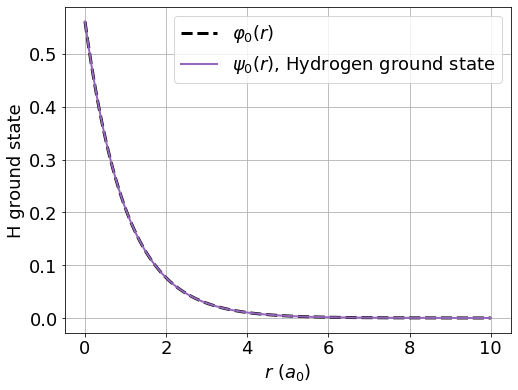

In [5]:
phi0_wrong_norm = u0/(np.sqrt(4*np.pi)*r)
k2 = 4*np.pi * np.trapz((phi0_wrong_norm*r)**2, r)  # The 4pi comes from the integration over all space of our symmetric wavefunction - not just radial wavefunction
phi0 = phi0_wrong_norm / np.sqrt(k2)  # L2-normalize the wave-function
# print(np.trapz(4*np.pi*(phi0*r)**2, r))

print(f'Ground state energy: E0 = {E0:.6f} a.u.')

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r, np.abs(phi0), color='k', linestyle='--', linewidth=3, label=r'$\varphi_0(r)$')
ax.plot(r, hydrogen_ground_state(r), color='C4', linestyle='-', linewidth=2, label=r'$\psi_0(r)$, Hydrogen ground state')
ax.legend(loc='best')
ax.grid()
ax.set_xlabel(r'$r$ $(a_0)$')
ax.set_ylabel(r'H ground state')

Here we seem to get $\varphi(r) = -\psi(r)$. But this is no problem, and is probably only an artefact of the eigenvalue solving routine. If $v$ is an eigenvector to $Av = \lambda v$, then $-v$ is an eigenvector to $A$ with the same eigenvalue. So we can take the absolute value.

## Problem 4 - Iterative solution

We need to iteratively improve our estimate of the ground state energy in the Hartree approximation. We thus use the solution of the Kohn-Sham equation, but omit the exchange-correlation term as well as the self-interaction from the Hartree potential, thus setting $V_H = V_{sH}$. Our procedure will thus look like 

1. Guess the initial density $|\varphi_{i}|^2$.
2. Obtain the estimate for the Hartree potential using $A' U_0' = B$ from Problem 2 to solve for $V_{sH} = U/r$.
3. Obtain the estimate of the ground state energy and the new density from the eigenvalue problem $\Lambda \tilde{u} = E\tilde{u}$ as in Problem 3.

We repeat this scheme until the ground state energy has converged. The matrix $\Lambda$ has the following form: 

\begin{equation}
    \Lambda = 
    \begin{bmatrix}
        \frac{1}{h^2} -\frac{2}{r_1} + V_{sH}(r_1) & -\frac{1}{2h^2} & 0 & 0 & 0 \\
         -\frac{1}{2h^2} & \frac{1}{h^2} -\frac{2}{r_2} + V_{sH}(r_2) & -\frac{1}{2h^2} & 0 & 0 \\
         0 & -\frac{1}{2h^2} & \frac{1}{h^2} -\frac{2}{r_3} + V_{sH}(r_3)  & -\frac{1}{2h^2} & 0 \\
        ... \\
    \end{bmatrix}
\end{equation}

We use the ground state of hydrogen as our input density:

$$ \varphi_i(r) = \frac{1}{\sqrt{\pi}} e^{-2r}$$

In [13]:
def eps_x(n):
    return -3/4 * (3*n/np.pi)**(1/3)

def deriv_eps_x(n):
    return -3/(4*np.pi) * (3*n/np.pi)**(-2/3)

def eps_c(n):
    rs = ( 3/(4*np.pi*n) )**(1/3)
    eps_c_vec = np.zeros(len(rs))
    geq1_idx = np.where(np.abs(rs)>=1)[0]
    
    # Define constants
    A = 0.0311
    B = -0.048
    C = 0.0020
    D = -0.0116
    
    gamma = -0.1423
    b1 = 1.0529
    b2 = 0.3334
    
    for i,ri in enumerate(len(rs)):
        if ri < geq1_idx:
            eps_c_vec[i] = A*np.log(ri) + B + C*ri*np.log(ri)+D*ri
        else:
            eps_c_vec[i] = gamma/( 1+ b1*np.sqrt(ri) + b2*ri )
    return eps_c_vec

def deriv_eps_c(n):
    '''Note that the derivative is w.r. using the chain rule!'''
    rs = ( 3/(4*np.pi*n) )**(1/3)
    d_eps_c_vec = np.zeros(len(rs))
    geq1_idx = np.where(np.abs(rs)>=1)[0]
    
    # Define constants
    A = 0.0311
    B = -0.048
    C = 0.0020
    D = -0.0116
    
    gamma = -0.1423
    b1 = 1.0529
    b2 = 0.3334
    
    for i,ri in enumerate(len(rs)):
        if ri < geq1_idx:
            d_eps_c_vec[i] = A/ri + C*np.log(ri) + C + D
        else:
            d_eps_c_vec[i] = -gamma*( b1 + 2*b2*np.sqrt(ri)) / ( 2*np.sqrt(ri) * (1 + b1*np.sqrt(x) + b2*x)**2 )
    d_eps_c_vec *= - (1/rs)**(4/3) / ( 6**(2/3) * np.pi**(1/3) ) # dn/drs
    return d_eps_c_vec 

def iterative_step(phi0, rmax, h, problem):
    '''Perform a step of the iterative solution. Prepared for Problems 5 and 6 with V_x and V_c.'''
     #******** Calculate new N, r and pad phi_density ***********
    N = int(rmax/h-1)
    r = np.array([(i+1)*h for i in range(N)]) # N points between endpoints
    phi_sq = phi0**2
    phi_sq = np.pad(phi_sq, (0,N-len(phi_sq)), 'edge')  # Pad density with last value to new maximum value
    A_p = np.zeros((N,N)) + np.diagflat(-2*np.ones(N), k=0) + np.diagflat(np.ones(N-1), k=1) + np.diagflat(np.ones(N-1), k=-1) 
    
    #******** Estimate V_sH ***********
    B = -np.array([4*np.pi*h**2*phi_sq[i]*r[i] for i in range(N)])
    U0_p = np.linalg.solve(A_p, B) # Solve the system of equations for U_0
    U = U0_p + r/rmax # Extract U
    V_sH = U/r # Extract the static potential
    
    if problem==4:
        V_H = V_sH
        V_x = np.zeros((N))
        V_c = np.zeros((N))
    elif problem==5:
        V_H = 2 * V_sH
        n = 2 * phi_sq
        V_x = eps_x(n) + n*deriv_eps_x(n)
        V_c = np.zeros((N))
    elif problem==6:
        V_H = 2 * V_sH
        n = 2 * phi_sq
        V_x = eps_x(n) + n*deriv_eps_x(n)
        V_c = eps_c(n) + n*deriv_eps_c(n)
    
    #******** Estimate E_0 and phi0 ***********
    Lambda = np.zeros((N,N)) + np.diagflat((1/h**2 - 2/r)*np.ones(N) + V_H + V_x + V_c, k=0) + np.diagflat(-1/(2*h**2)*np.ones(N-1), k=1) + np.diagflat(-1/(2*h**2)*np.ones(N-1), k=-1)

    eigs, eigv = np.linalg.eigh(Lambda)  # Solve the eigenvalue problem for eigenvectors and eigenfunctions 
    eps = eigs[0]  # The eigenvalues & vectors are returned in ascending order, thus with the ground state first
    u0 = eigv[:,0]  # Normalized eigenvector
    
    phi0_wrong_norm = u0/(np.sqrt(4*np.pi)*r)
    k2 = 4*np.pi * np.trapz((phi0_wrong_norm*r)**2, r)  # The 4pi comes from the integration over all space of our symmetric wavefunction - not just radial wavefunction
    phi0 = phi0_wrong_norm / np.sqrt(k2)  # L2-normalize the wave-function
    
    # Calculate the ground state energy
    u2 = 4 * np.pi * r**2 * phi0**2 
    # Calculate these again - a bit wasteful but ensures correct wavefcn etc.
    if problem==4:
        eps_xc = 0
        Vxc = 0
    elif problem==5:
        n = 2 * phi0**2
        eps_xc = eps_x(n)
        V_x = eps_x(n) + n*deriv_eps_x(n) # Get the new exchange potential - linearity
        V_c = 0 
        Vxc = V_x + V_c  # Assume the potential can be split in two
    elif problem==6:
        n = 2 * phi0**2
        eps_xc = eps_x(n)
        V_x = eps_x(n) + n*deriv_eps_x(n) # Get the new exchange potential - linearity
        V_c = eps_c(n) + n*deriv_eps_c(n)
        Vxc = V_x + V_c 
        
    E0 = 2*eps - 2*np.trapz(u2 * ( 0.5*V_H + Vxc - eps_xc ), r)
#     print(f'Ground state energy: E0 = {E0:.6f} a.u.')
    
    #******** Return E_0 and phi_0 ***********
    return E0, phi0, eps, r


def self_consistent(p=4, max_iters=500, tol=1e-5):    
    '''
    Performs the self-consistent loop for a certain problem, and plots the results
    max_iters: maximum iterations for convergence of each rmax and h.
    '''
    # Iteration parameters
    energies = []  # Ground-state energies
    iters = 0
    previous_E = -999 # No previous energy

    #******** Initial Step ********* 
    rmax = 10 # Initial rmax
    h = 0.1 # Initial grid spacing
    N = int(rmax/h-1)  # Rmax = (N+1)*h for N+2 steps including 0 and rmax
    r = np.array([(i+1)*h for i in range(N)]) # N points between endpoints
    # Make an initial estimate of the energy and ground state density:
    E0, phi0, eps, r = iterative_step(hydrogen_ground_state(r), rmax, h, problem=p)
    energies.append(E0)

    #******** Iteratively increase rmax *********
    fig, ax = plt.subplots(figsize=(8,6))
    while np.abs(E0-previous_E) > tol and iters<max_iters:
        rmax *= 1.01 # Update parameter
        previous_E = E0  # Save previous energy
        E0, phi0, eps, r = iterative_step(phi0, rmax, h, problem=p)
        energies.append(E0)
        if iters%100==0:
            ax.plot(r, np.abs(phi0), linestyle='--', alpha=1, linewidth=2, label=f'Iter={iters}, rmax={rmax:.2f}, h={h:.4f}')
        iters += 1
    h_iters = iters
    print(f'Increased rmax for {iters} iterations')

    #******** Iteratively decrease h *********
    previous_E = -999 # restart to decrease h
    while np.abs(E0-previous_E) > tol and iters-h_iters<max_iters:
        h *= 0.99  # Decrease h

        previous_E = E0  # Save previous energy
        E0, phi0, eps, r = iterative_step(phi0, rmax, h, problem=p)
        energies.append(E0)
        if iters%100==0:
            ax.plot(r, np.abs(phi0), linestyle='--', alpha=1, linewidth=2, label=f'Iter={iters}, rmax={rmax:.2f}, h={h:.4f}')
        iters += 1
    print(f'Decreased h for {iters-h_iters} iterations')
    print(f'Converged in {iters} iterations.')
    print(f'Ground state energy: {energies[-1]:.4f} a.u., eigenvalue: {eps:.4f}')

    #******** Plot wavefunctions *********
    ax.plot(r, np.abs(phi0), linestyle=':', alpha=0.8, linewidth=2, label=f'Final, Iter={iters}, rmax={rmax:.2f}, h={h:.4f}')
    ax.legend(loc='best')
    ax.grid()
    ax.set_xlabel(r'$r$ $(a_0)$')
    ax.set_ylabel(r'He ground state')    

    #******** Plot energies *********
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(energies, color='k', linestyle='--', linewidth=3, label=f'Hartree method, E0 = {energies[-1]:.4f}')
    ax.axhline(-2.848, color='C2', linewidth=3, label='Screened solution')
    ax.axhline(-2.750, color='C4', linewidth=3, label='Non-screened solution')
    ax.axhline(-2.9033, color='C6', linewidth=3, label='Experimental value')
    ax.axvline(h_iters, color='k', linewidth=2, alpha=0.6, label=r'Start to decrease $h$')
    ax.legend(loc='best')
    ax.grid()
    ax.set_xlabel(r'Iteration - increasing $r_{max}$ and decreasing $h$')
    ax.set_ylabel(r'$E_0$')

Increased rmax for 71 iterations
Decreased h for 141 iterations
Converged in 212 iterations.
Ground state energy: -2.8836 a.u., eigenvalue: -0.9390


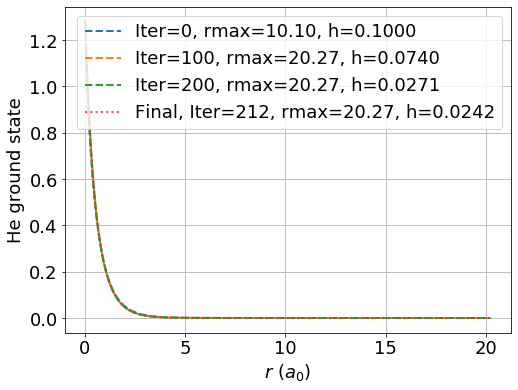

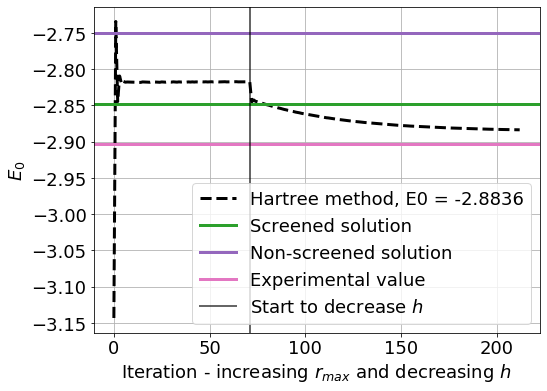

In [29]:
problem = 4 # Current problem
max_iters = 500
self_consistent(problem, max_iters, tol=1e-5)  # max_iters is max for rmax opt. and h opt. 

## Problem 5 - Adding exchange contributions

We now add exchange contributions to problem 4. We use the full Hartree potential, i.e. setting $V_H=2 V_{sH}$. Using the LDA approximation, we can write the exchange-correlation potential as:

$$ \epsilon_{xc} = \epsilon_x + \epsilon_c = \epsilon_x + 0 = -\frac{3}{4}\left(\frac{3n}{\pi}\right)^{1/3}$$
$$ V_{xc} = \epsilon_{xc} + n \frac{d}{dn}\epsilon_{xc} = -\frac{3}{4}\left(\frac{3n}{\pi}\right)^{1/3} - n\frac{3}{4\pi}\left(\frac{3n}{\pi}\right)^{-2/3} $$

Increased rmax for 72 iterations
Decreased h for 92 iterations
Converged in 164 iterations.
Ground state energy: -2.7546 a.u., eigenvalue: -0.5492


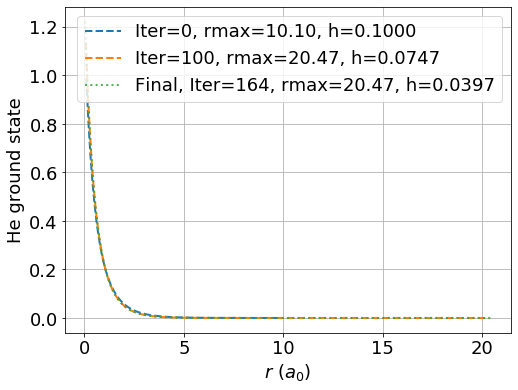

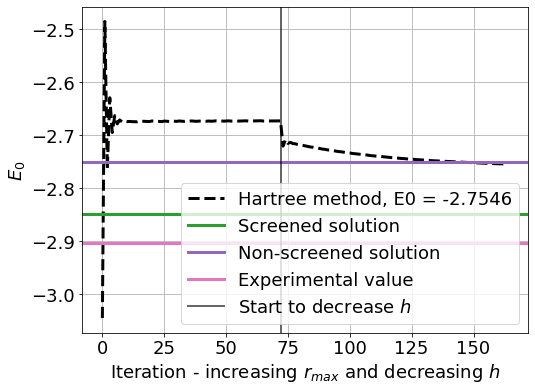

In [34]:
problem = 5 # Current problem
max_iters = 500
self_consistent(problem, max_iters, tol=1e-5)  # max_iters is max for rmax opt. and h opt. 

This method results in a ground-state energy that is $\approx 5\%$ off from the results from problem 4. Something strange is that we seem to obtain a larger value, which is counter-intuitive given that our method is based around the variational principle. 

## Problem 6

Same as problem 5, but we add the correlation term. The added terms are 

$$ \epsilon_c(rs) = \frac{\gamma}{1+\beta_1\sqrt{r_s} + \beta_2 r_s}, \hspace{10px} rs \geq 1  $$
$$ \epsilon_c(rs) = A \log{r_s} + B + C r_s\log{r_s} + D r_s, \hspace{10px} rs \le 1  $$

Using the chain rule, we can compute the derivative $ \frac{d}{dn}\epsilon_c = \frac{dr_s}{dn} \frac{d\epsilon_c}{dr_s}$

$$ \frac{d\epsilon_c}{dr_s} = -\frac{\gamma(\beta_1+2\beta_2\sqrt{r_s})}{2\sqrt{r_s}(1 + \beta_1\sqrt{r_s} + \beta_2 r_s )^2}, \hspace{10px} rs \geq 1  $$
$$ \frac{d\epsilon_c}{dr_s} = \frac{A}{r_s} + C\log{r_s} + C + D, \hspace{10px} rs \le 1  $$
$$ \frac{dr_s}{dn} = -\frac{\left(\frac{1}{rs}\right)^{4/3}}{6^{2/3} \pi^{1/3}}, \hspace{10px} \forall r_s  $$

[  0.77083848   0.8239794    0.8807838    0.94150425   1.00641071
   1.07579176   1.14995589   1.22923282   1.31397503   1.40455929
   1.50138835   1.60489272   1.71553259   1.83379988   1.9602204
   2.09535624   2.23980823   2.3942186    2.55927389   2.73570795
   2.9243052    3.12590419   3.34140123   3.57175444   3.817988
   4.08119668   4.36255073   4.66330107   4.98478488   5.32843149
   5.69576879   6.08843      6.50816092   6.95682771   7.4364252
   7.9490857    8.49708856   9.08287025   9.7090352   10.3783674
  11.09384277  11.85864237  12.67616657  13.55005016  14.4841785
  15.48270481  16.55006864  17.69101557  18.91061836  20.21429948
  21.60785521  23.09748142  24.68980114  26.39189395  28.21132752
  30.15619121  32.23513206  34.45739324  36.83285512  39.37207921
  42.08635514  44.98775083  48.08916614  51.40439025  54.94816295
  58.73624017  62.78546404  67.11383778  71.74060574  76.68633895
  81.97302658  87.62417373  93.66490591 100.12208076 107.02440747
 114.40257442 12

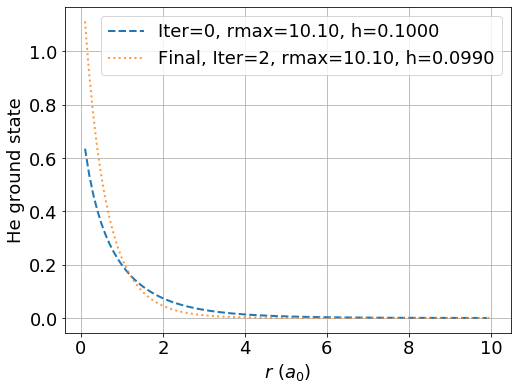

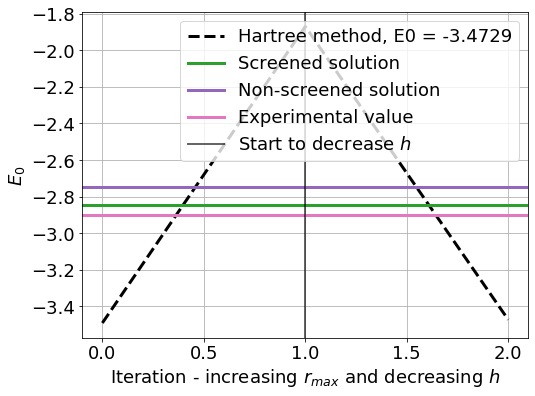

In [11]:
problem = 6 # Current problem
max_iters = 500
self_consistent(problem, max_iters, tol=1e-5)  # max_iters is max for rmax opt. and h opt. 